<a href="https://colab.research.google.com/github/GoshKolotyan/Deep-Learning-TensorFlow2-/blob/main/05_Covoultinal_Neural_Network_Multiclass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mutli-class Image Classification
We have just been through a bunch of the following steps with a binary classification problem(pizza or steak), now we are going to step things up a notch with 10 classes of food (multi-class classification).

1. Become one with the data
2. Preprocess the data (get it ready for a model)
3. Create a model (start with a baseline)
4. Fit the model (overfit it to make sure it works)
5. Evaluate the model
6. Adjust different hyperparameters and imporove the model(try to beat baseline/reduce overfitting).
7. Repeat until satisfied

![](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/misc-tensorflow-workflow-outline.png)
*The workflow we're about to go through is a slightly modified version of the above image. As you keep going through deep learning problems, you'll find the workflow above is more of an outline than a step-by-step guide.*

##1.Import and become one with the data

In [ ]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

zip_ref = zipfile.ZipFile('10_food_classes_all_data.zip','r')
zip_ref.extractall()
zip_ref.close()

--2023-05-12 11:10:06--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.125.128, 142.250.136.128, 142.251.172.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.125.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip.1’

10_food_classes_all 100%[===================>] 495.13M   225MB/s    in 2.2s    

2023-05-12 11:10:08 (225 MB/s) - ‘10_food_classes_all_data.zip.1’ saved [519183241/519183241]



In [ ]:
import os
for dirpath,dirnames,filenames in os.walk('10_food_classes_all_data'):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}' .")

There are 2 directories and 0 images in '10_food_classes_all_data' .
There are 10 directories and 0 images in '10_food_classes_all_data/train' .
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger' .
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak' .
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon' .
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry' .
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi' .
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen' .
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream' .
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza' .
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings' .
There are 0 directories and 750 images in '10_food_classes_all_data/train/f

In [ ]:
!ls -la 10_food_classes_all_data/

total 16
drwxr-xr-x  4 root root 4096 May 12 10:52 .
drwxr-xr-x  1 root root 4096 May 12 11:10 ..
drwxr-xr-x 12 root root 4096 May 12 10:52 test
drwxr-xr-x 12 root root 4096 May 12 10:52 train


In [ ]:
#Set up train and test directories
train_dir = '10_food_classes_all_data/train/'
test_dir = '10_food_classes_all_data/test/'

In [ ]:
#Let's get the class names
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [ ]:
#View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (384, 512, 3)


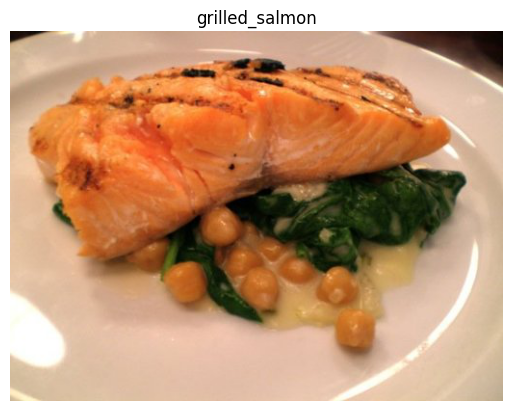

In [ ]:
#Visualize,visualize,visualize
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names)) #get a random class name

## 2. Preprocess the data (get it ready for a model)

In [ ]:
#get the shapes of image
print(f"Our image have width {(img.shape[0])}  height {img.shape[1]}  channels {img.shape[2]}")
# print(f"Our image have width {(img.shape[0])} Height {img.shape[1]} and colour channel {img.shape[2]}")

Our image have width 384  height 512  channels 3


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#Rescale
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

#Load data in from directores and turn it inti batches
train_data = train_datagen.flow_from_directory(train_dir,
                                              target_size=(224,224),
                                              batch_size=32,
                                              class_mode='categorical')
test_data = test_datagen.flow_from_directory(test_dir,
                                            target_size=(224,224),
                                            batch_size=32,
                                            class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### 3. Creat a model(start with a baseline)

We have been talking a lot about the [CNN explainer](https://poloclub.github.io/cnn-explainer/) website...
how about we just take their model(also on 10 classes) and use it for our problem.

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,MaxPool2D,Conv2D,Flatten,Activation

# Creat our model
model_8 = Sequential([
    Conv2D(10,3,activation='relu',input_shape=(224,224,3)),
    Activation(activation='relu'),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10,activation='softmax')
])

#Compiling the model
model_8.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])


##4.Fit the model

In [ ]:
history_8 = model_8.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=int(0.25*len(test_data)))

Epoch 1/5
235/235 [==============================] - 53s 205ms/step - loss: 2.1443 - accuracy: 0.2179 - val_loss: 2.0165 - val_accuracy: 0.2928
Epoch 2/5
235/235 [==============================] - 46s 194ms/step - loss: 1.8490 - accuracy: 0.3687 - val_loss: 1.8905 - val_accuracy: 0.3388
Epoch 3/5
235/235 [==============================] - 45s 193ms/step - loss: 1.4128 - accuracy: 0.5268 - val_loss: 2.1195 - val_accuracy: 0.2961
Epoch 4/5
235/235 [==============================] - 46s 198ms/step - loss: 0.7355 - accuracy: 0.7628 - val_loss: 2.7918 - val_accuracy: 0.2434
Epoch 5/5
235/235 [==============================] - 43s 182ms/step - loss: 0.2368 - accuracy: 0.9281 - val_loss: 4.6824 - val_accuracy: 0.2303


<Axes: >

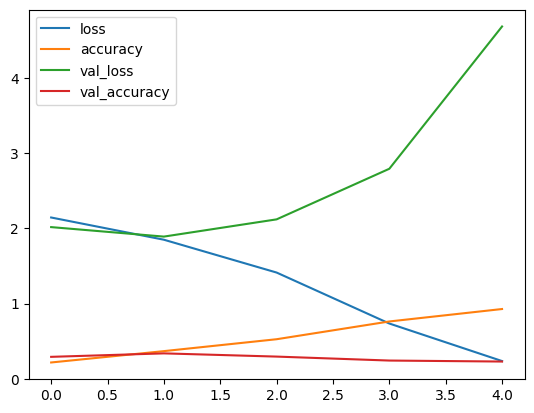

In [ ]:
import pandas as pd
pd.DataFrame(history_8.history).plot()

##5.Evaluate the model

In [ ]:
model_8.evaluate(test_data)

79/79 [==============================] - 16s 205ms/step - loss: 4.4487 - accuracy: 0.2488


[4.448705673217773, 0.24879999458789825]

In [ ]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

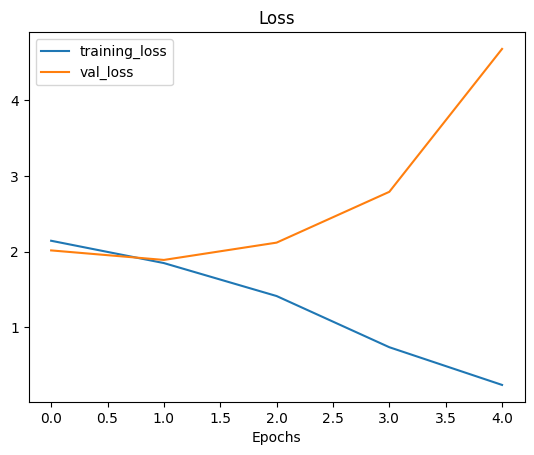

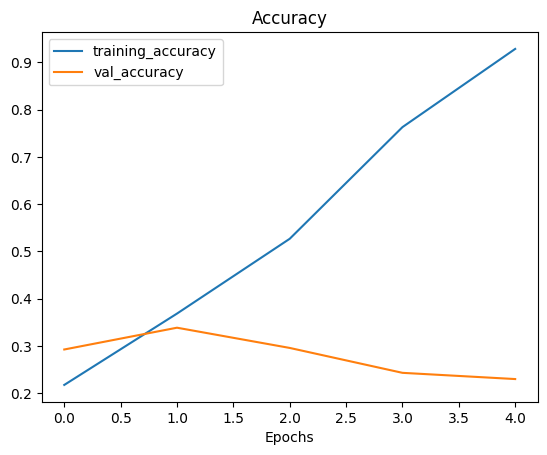

In [ ]:
#Check out model's loss curves
plot_loss_curves(history_8)

What do these loss curves tell us?

Well... it seems our model is **overfitting** the trainig set quite badly... in other words,it is getting great results on the training data but fails to generelize well to unseen data and perform poorly on the test dataset

###6. Adjust the model hyperparameters(to beat the basline/reduce overfitting)

Due to its performance on the training data,it is clear our model is learning something...

However it is not generalizing well to unseen data(overfitting).

So,let's try and fix overfitting by ...

* **Get more data** - having more data gives a model opportunity to learn diverse patterns...
* **Simpliy the model** - if our current model is overfitting the data , it may be too comlicated of model, one way to simplify a model is to: reduce #hidden units in layers
* **Use data augmentetion** -data augmentaiton manipulates the training data in such a way to add more diversity to it (without altering the original data)
* **Use transfer learning** - tranfer learning levergesn the patterns another model has learned on similar data to your own and allows you to use those patterns on your own dataset


In [ ]:
#how about we try and simplify the model first?
#Let's try to remove 2 convolutional layers...
model_9 = Sequential([
    Conv2D(filters=10,kernel_size=3,activation='relu',input_shape=(224,224,3)),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10,activation='softmax')
])
model_9.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [ ]:
model_9.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 29160)             0         
                                                                 
 dense_1 (Dense)             (None, 10)               

In [ ]:
history_9 = model_9.fit(train_data,
                       epochs=5,
                       steps_per_epoch=len(train_data),
                       validation_data=test_data,
                       validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 52s 215ms/step - loss: 2.1209 - accuracy: 0.2400 - val_loss: 1.9791 - val_accuracy: 0.2896
Epoch 2/5
235/235 [==============================] - 50s 213ms/step - loss: 1.8036 - accuracy: 0.3811 - val_loss: 1.8830 - val_accuracy: 0.3572
Epoch 3/5
235/235 [==============================] - 50s 212ms/step - loss: 1.4621 - accuracy: 0.5103 - val_loss: 1.8927 - val_accuracy: 0.3604
Epoch 4/5
235/235 [==============================] - 50s 215ms/step - loss: 1.0202 - accuracy: 0.6743 - val_loss: 2.1370 - val_accuracy: 0.3380
Epoch 5/5
235/235 [==============================] - 50s 215ms/step - loss: 0.6189 - accuracy: 0.8156 - val_loss: 2.7528 - val_accuracy: 0.3172


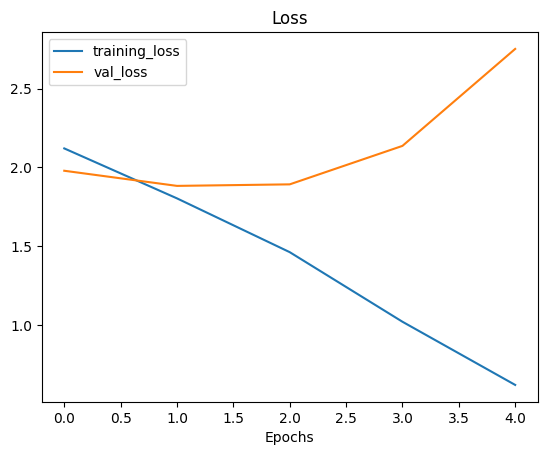

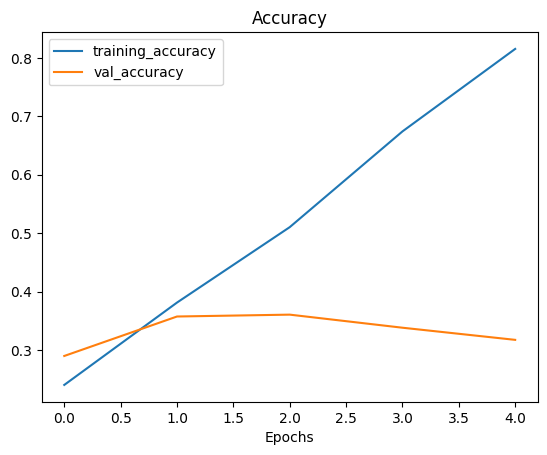

In [ ]:
#Check out loss curves of model_9
plot_loss_curves(history_9)

Look like it didn't work
Use data augmentetion

##Try to reduce overfitting with data augmentation

In [ ]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size=(224,224),
                                                                  batch_size=32,
                                                                  class_mode='categorical')

Found 7500 images belonging to 10 classes.


In [ ]:
model_10 = tf.keras.models.clone_model(model_8)
model_10.compile(loss = 'categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

In [ ]:
model_10.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 activation (Activation)     (None, 222, 222, 10)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                        

In [ ]:
history_10 = model_10.fit(train_data_augmented,
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 128s 530ms/step - loss: 2.2322 - accuracy: 0.1567 - val_loss: 2.1067 - val_accuracy: 0.2344
Epoch 2/5
235/235 [==============================] - 127s 540ms/step - loss: 2.1254 - accuracy: 0.2284 - val_loss: 1.9833 - val_accuracy: 0.2852
Epoch 3/5
235/235 [==============================] - 130s 555ms/step - loss: 2.0339 - accuracy: 0.2801 - val_loss: 1.9106 - val_accuracy: 0.3340
Epoch 4/5
235/235 [==============================] - 136s 580ms/step - loss: 1.9803 - accuracy: 0.3012 - val_loss: 1.8973 - val_accuracy: 0.3332
Epoch 5/5
235/235 [==============================] - 128s 546ms/step - loss: 1.9442 - accuracy: 0.3212 - val_loss: 1.8893 - val_accuracy: 0.3312


In [ ]:
model_10.evaluate(test_data)

79/79 [==============================] - 13s 165ms/step - loss: 1.8893 - accuracy: 0.3312


[1.889276385307312, 0.3312000036239624]

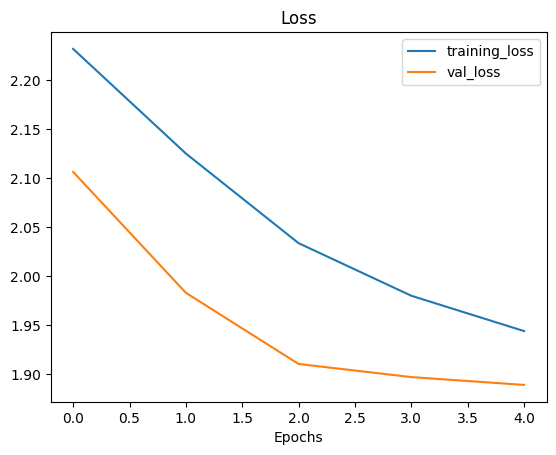

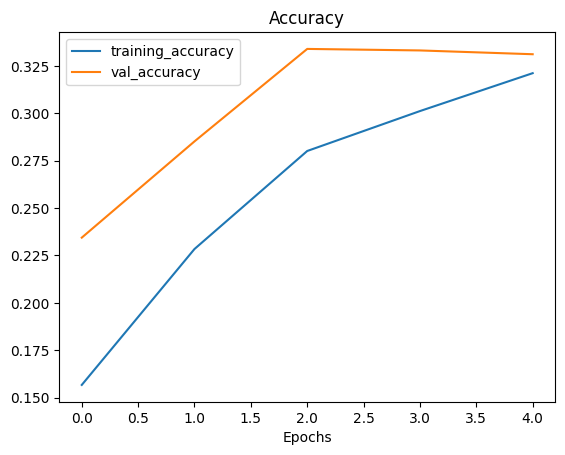

In [ ]:
plot_loss_curves(history_10)

###7.Repeat until satified

1. restructuring our model's architecture(increasing layers/hidden units)
2. adjust the learn rate
3. try different methods of data augmentation
4. training more longer
5. try **transfer learning**

## Make prediction with our train model

Lets use our tarining model to make some prediction on our model

In [ ]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

In [ ]:
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [ ]:
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

1/1 [==============================] - 0s 45ms/step


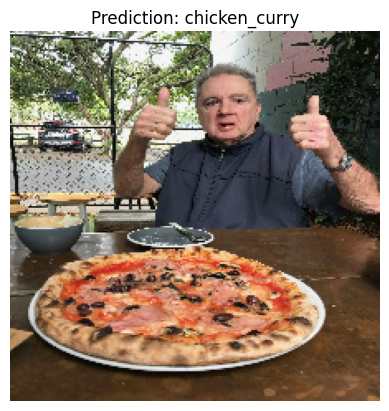

In [ ]:
#Make prediction using model_10
pred_and_plot(model_10,filename='03-pizza-dad.jpeg',
              class_names=class_names)

1/1 [==============================] - 0s 32ms/step


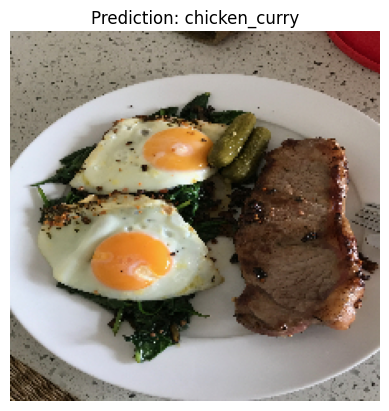

In [ ]:
pred_and_plot(model_10,filename='03-steak.jpeg',class_names=class_names)

1/1 [==============================] - 0s 21ms/step


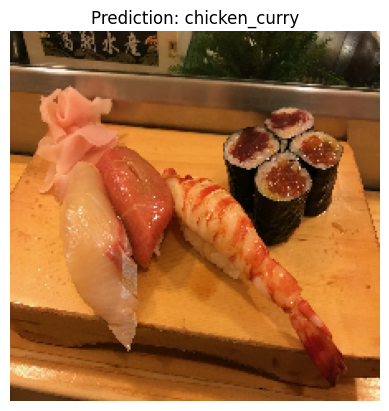

In [ ]:
pred_and_plot(model=model_10,filename='03-sushi.jpeg',class_names=class_names)

Looks like our model did not perform very well on our custom images bit this becouse it only achieved ~33 % accuarcy on the test data.So we can expect it to function quite poorly on unseen data

## Saving and loading model

In [ ]:
#Save model
model_10.save('saved_trained_model_10')

In [ ]:
#Load in a trained model and evaluate it
loaded_model_10 = tf.keras.models.load_model('saved_trained_model_10')
loaded_model_10.evaluate(test_data)

79/79 [==============================] - 13s 163ms/step - loss: 1.8893 - accuracy: 0.3312


[1.8892757892608643, 0.3312000036239624]

In [ ]:
model_10.evaluate(test_data)

79/79 [==============================] - 15s 190ms/step - loss: 1.8893 - accuracy: 0.3312


[1.8892760276794434, 0.3312000036239624]